In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

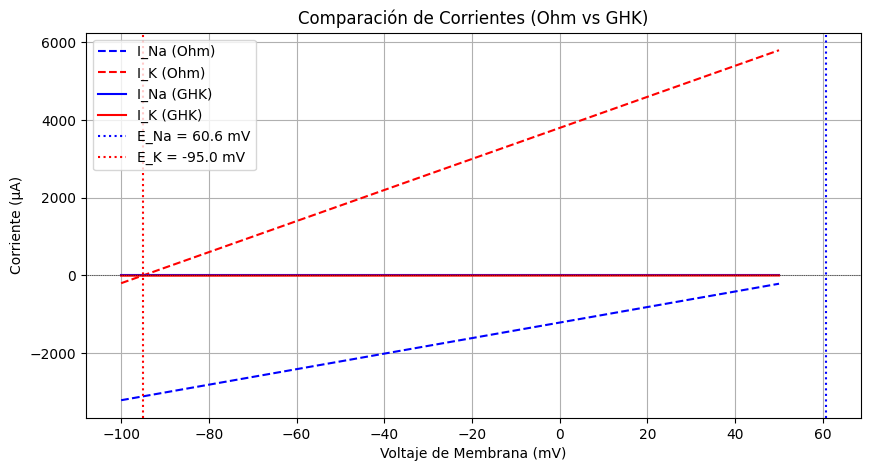

(np.float64(60.634331643053386), np.float64(-95.02257566586907))

In [2]:

# Constantes fisiológicas
R = const.R  # Constante de los gases (J/(mol*K))
T = 310.15   # Temperatura en Kelvin (37°C)
F = const.physical_constants["Faraday constant"][0]  # Constante de Faraday (C/mol)

# Concentraciones intra y extracelulares de Na+ y K+ en mM
Na_in = 15   # mM
Na_out = 145  # mM
K_in = 140   # mM
K_out = 4    # mM

# Cálculo del potencial de equilibrio usando la ecuación de Nernst
def nernst_potential(ion_out, ion_in):
    return (R * T / F) * np.log(ion_out / ion_in) * 1000  # mV

E_Na = nernst_potential(Na_out, Na_in)
E_K = nernst_potential(K_out, K_in)

# Definir el rango de voltajes de membrana de -100 mV a 50 mV
V_m = np.linspace(-100, 50, 200)  # mV

# Suposición de conductancias en µS (microsiemens)
g_Na = 20  # µS
g_K = 40   # µS

# Cálculo de la corriente usando la ley de Ohm
I_Na_Ohm = g_Na * (V_m - E_Na)
I_K_Ohm = g_K * (V_m - E_K)

# Permeabilidades relativas de Na+ y K+ en cm/s
P_Na = 1.2e-8  # cm/s
P_K = 3.6e-7   # cm/s

# Cálculo de la corriente usando la ecuación de Goldman-Hodgkin-Katz (GHK)
def ghk_current(V, P, ion_out, ion_in):
    V = V / 1000  # Convertir mV a V
    return P * V * (ion_out - ion_in * np.exp(-V * F / (R * T))) / (1 - np.exp(-V * F / (R * T)))

I_Na_GHK = ghk_current(V_m, P_Na, Na_out, Na_in) * 1e6  # Convertir a µA
I_K_GHK = ghk_current(V_m, P_K, K_out, K_in) * 1e6  # Convertir a µA

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(V_m, I_Na_Ohm, label="I_Na (Ohm)", linestyle="dashed", color="blue")
plt.plot(V_m, I_K_Ohm, label="I_K (Ohm)", linestyle="dashed", color="red")
plt.plot(V_m, I_Na_GHK, label="I_Na (GHK)", color="blue")
plt.plot(V_m, I_K_GHK, label="I_K (GHK)", color="red")
plt.axhline(0, color="black", linewidth=0.5, linestyle="dotted")
plt.axvline(E_Na, color="blue", linestyle="dotted", label=f"E_Na = {E_Na:.1f} mV")
plt.axvline(E_K, color="red", linestyle="dotted", label=f"E_K = {E_K:.1f} mV")
plt.xlabel("Voltaje de Membrana (mV)")
plt.ylabel("Corriente (µA)")
plt.title("Comparación de Corrientes (Ohm vs GHK)")
plt.legend()
plt.grid()
plt.show()

# Mostrar los valores calculados de potencial de equilibrio
E_Na, E_K
